In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import easygui

GETTING IMAGE DATA

In [22]:
path="mostbeautiful.jpg" # We take the Realtive image path
img=cv2.imread(path) 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # As imread() reads file in BGR form we convert it to RGB

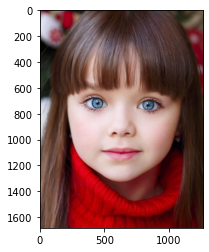

In [23]:
plt.imshow(img)
plt.show()

In [24]:
print(img) # RGB format img info.

[[[146  89  78]
  [140  82  71]
  [142  82  72]
  ...
  [142 124 100]
  [143 125 101]
  [143 125 101]]

 [[146  89  78]
  [139  82  71]
  [142  82  72]
  ...
  [140 122  98]
  [141 123  99]
  [141 123  99]]

 [[144  90  78]
  [137  83  71]
  [141  84  73]
  ...
  [138 120  96]
  [139 121  97]
  [139 121  97]]

 ...

 [[ 94  66  55]
  [ 99  72  61]
  [100  73  62]
  ...
  [ 70  33  17]
  [ 69  32  16]
  [ 69  32  16]]

 [[ 97  69  58]
  [103  75  64]
  [103  76  65]
  ...
  [ 70  33  17]
  [ 69  32  16]
  [ 69  32  16]]

 [[ 98  70  59]
  [104  76  65]
  [104  77  66]
  ...
  [ 70  33  17]
  [ 69  32  16]
  [ 69  32  16]]]


CREATING EDGE MASK

In [25]:
image=img
def edge_mask(img, blur_val):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur=cv2.medianBlur(gray, blur_val) # smoothening the image using median blur method
    edges=cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 3)
    return edges

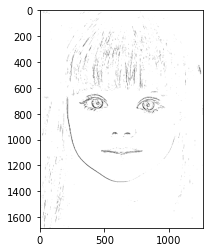

In [26]:
blur_val = 9
z=img
edges= edge_mask (img, blur_val)

plt.imshow(edges, cmap = "gray")
plt.show()

REDUCING COLOR PALETTE

In [27]:
def clr(img, k):
    data= np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20 , 0.001)
    r,l, center = cv2.kmeans (data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS )
    center= np.uint8(center)
    result= center[l.flatten()]
    result= result.reshape (img.shape)
    return result

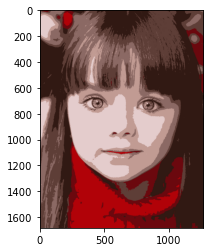

In [28]:
img= clr(image, k=7)
plt.imshow(img)
plt.show()

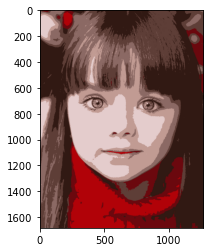

In [29]:
blurr=cv2.bilateralFilter(img, d=6,sigmaColor= 200, sigmaSpace=200)
plt.imshow(img)
plt.show()

Cartoonified Image


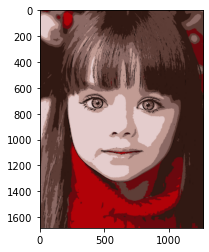

Original Image


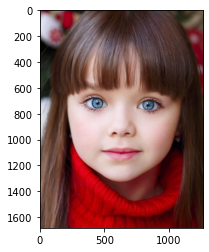

In [33]:
c=cv2.bitwise_and(blurr, blurr, mask=edges)
print ("Cartoonified Image")
plt.imshow(c)
plt.show()
print ("Original Image")
plt.imshow(image)
plt.show()